In [1]:
import h2o

In [26]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,37 mins 52 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_vibho_rlse6t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.970 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [42]:
churn = h2o.import_file('/churn.txt')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
churn.types

{'State': 'enum',
 'Account Length': 'int',
 'Area Code': 'int',
 'Phone': 'string',
 "Int'l Plan": 'enum',
 'VMail Plan': 'enum',
 'VMail Message': 'int',
 'Day Mins': 'real',
 'Day Calls': 'int',
 'Day Charge': 'real',
 'Eve Mins': 'real',
 'Eve Calls': 'int',
 'Eve Charge': 'real',
 'Night Mins': 'real',
 'Night Calls': 'int',
 'Night Charge': 'real',
 'Intl Mins': 'real',
 'Intl Calls': 'int',
 'Intl Charge': 'real',
 'CustServ Calls': 'int',
 'Churn': 'enum'}

In [44]:
churn.describe()

Rows:3333
Cols:21




,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
type,enum,int,int,string,enum,enum,int,real,int,real,real,int,real,real,int,real,real,int,real,int,enum
mins,,1.0,408.0,NaN,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.2,33.0,1.04,0.0,0.0,0.0,0.0,
mean,,101.06480648064806,437.18241824182417,NaN,,,8.099009900990099,179.775097509751,100.43564356435644,30.56230723072307,200.98034803480348,100.11431143114311,17.083540354035403,200.87203720372037,100.10771077107711,9.03932493249325,10.237293729372938,4.4794479447944795,2.7645814581458144,1.5628562856285628,
maxs,,243.0,510.0,NaN,,,51.0,350.8,165.0,59.64,363.7,170.0,30.91,395.0,175.0,17.77,20.0,20.0,5.4,9.0,
sigma,,39.822105928595604,42.371290485606615,NaN,,,13.688365372038596,54.46738920237138,20.069084207300897,9.2594345539305,50.713844425812,19.922625293943103,4.3106676431103415,50.57384701365836,19.56860934605856,2.275872837660029,2.7918395484084155,2.4612142705460944,0.753772612663046,1.3154910448664765,
zeros,,0,0,0,,,2411,2,2,2,1,1,1,0,0,0,18,18,18,697,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.7,1.0,False.
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.7,1.0,False.
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,121.2,110.0,10.3,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.


In [45]:
churn_train,churn_test,churn_valid = churn.split_frame(ratios=[.7, .15])

In [46]:
churn_train

State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
MO,147,415,329-9001,yes,no,0,157,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
IA,168,408,363-1107,no,no,0,128.8,96,21.9,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False.
IA,62,415,366-9238,no,no,0,120.7,70,20.52,307.2,76,26.11,203,99,9.14,13.1,6,3.54,4,False.


In [47]:
y = "Churn"
x = churn.columns
x.remove(y)


In [48]:
x

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls']

In [50]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [52]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |█
13:37:13.906: Project: AutoML_20210128_133713899
13:37:13.910: Cross-validation disabled by user: no fold column nor nfolds > 1.
13:37:13.910: Setting stopping tolerance adaptively based on the training frame: 0.020650405139110022
13:37:13.910: Build control seed: 10
13:37:13.911: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
13:37:13.964: training frame: Frame key: automl_training_py_14_sid_bbdf    cols: 21    rows: 2120  chunks: 32    size: 310852  checksum: -2707124105899465065
13:37:13.964: validation frame: Frame key: py_16_sid_bbdf    cols: 21    rows: 488  chunks: 32    size: 149668  checksum: -3355413684326385181
13:37:13.965: leaderboard frame: Frame key: automl_leaderboard_py_14_sid_bbdf    cols: 21    rows: 225  chunks: 32    size: 147177  checksum: 8682011119250429740
13:37:13.966: blending frame: NULL
13:37:13.966: response column: 

In [53]:

lb = aml.leaderboard

In [54]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_20210128_133713,0.963245,0.150436,0.880006,0.0832254,0.20546,0.0422137
GBM_2_AutoML_20210128_133713,0.959683,0.154404,0.887976,0.130181,0.20578,0.0423453
GBM_grid__1_AutoML_20210128_133713_model_2,0.957902,0.150206,0.899954,0.140625,0.196525,0.0386221
GBM_grid__1_AutoML_20210128_133713_model_1,0.956606,0.177004,0.832552,0.150988,0.224675,0.0504791
GBM_5_AutoML_20210128_133713,0.954825,0.193679,0.846312,0.106622,0.235271,0.0553525
GBM_1_AutoML_20210128_133713,0.951749,0.156306,0.872356,0.0910784,0.20386,0.041559
DRF_1_AutoML_20210128_133713,0.944624,0.327995,0.849368,0.0779631,0.230922,0.0533248
GBM_4_AutoML_20210128_133713,0.942681,0.170837,0.860201,0.127591,0.207506,0.0430589
XRT_1_AutoML_20210128_133713,0.935071,0.348792,0.807256,0.0960978,0.246021,0.0605262
GLM_1_AutoML_20210128_133713,0.89103,0.286189,0.544355,0.174223,0.299204,0.0895233


In [55]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [56]:
churn_pred.head()

predict,False.,True.
False.,0.987217,0.0127827
False.,0.984842,0.0151579
False.,0.989567,0.0104332
False.,0.995852,0.00414806
False.,0.966216,0.0337837
False.,0.979938,0.0200619
False.,0.994991,0.00500872
False.,0.994477,0.00552333
False.,0.986901,0.0130989
False.,0.98829,0.0117102


In [57]:
aml.leader.model_performance(churn_test)



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.04737817652513353
RMSE: 0.21766528553063652
LogLoss: 0.19949367525187306
Mean Per-Class Error: 0.12409138110072693
AUC: 0.9115394600207685
AUCPR: 0.8341125909608945
Gini: 0.8230789200415369

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4194192193464434: 


,,False.,True.,Error,Rate
0,False.,424.0,4.0,0.0093,(4.0/428.0)
1,True.,20.0,52.0,0.2778,(20.0/72.0)
2,Total,444.0,56.0,0.048,(24.0/500.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.419419,0.812500,55.0
1,max f2,0.084508,0.785908,80.0
2,max f0point5,0.462034,0.885417,53.0
3,max accuracy,0.462034,0.952000,53.0
4,max precision,0.993595,1.000000,0.0
5,max recall,0.002119,1.000000,389.0
6,max specificity,0.993595,1.000000,0.0
7,max absolute_mcc,0.419419,0.793628,55.0
8,max min_per_class_accuracy,0.037175,0.861111,115.0
9,max mean_per_class_accuracy,0.084508,0.875909,80.0



Gains/Lift Table: Avg response rate: 14.40 %, avg score: 11.25 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.984556,6.944444,6.944444,1.00,0.990040,1.000000,0.990040,0.069444,0.069444,594.444444,594.444444,0.069444
1,2,0.02,0.965150,6.944444,6.944444,1.00,0.974334,1.000000,0.982187,0.069444,0.138889,594.444444,594.444444,0.138889
2,3,0.03,0.949174,6.944444,6.944444,1.00,0.956403,1.000000,0.973592,0.069444,0.208333,594.444444,594.444444,0.208333
3,4,0.04,0.941139,6.944444,6.944444,1.00,0.945575,1.000000,0.966588,0.069444,0.277778,594.444444,594.444444,0.277778
4,5,0.05,0.913736,5.555556,6.666667,0.80,0.931249,0.960000,0.959520,0.055556,0.333333,455.555556,566.666667,0.330997
5,6,0.10,0.579875,6.388889,6.527778,0.92,0.806743,0.940000,0.883132,0.319444,0.652778,538.888889,552.777778,0.645768
6,7,0.15,0.095757,2.500000,5.185185,0.36,0.237776,0.746667,0.668013,0.125000,0.777778,150.000000,418.518519,0.733385
7,8,0.20,0.053919,1.111111,4.166667,0.16,0.071558,0.600000,0.518899,0.055556,0.833333,11.111111,316.666667,0.739875
8,9,0.30,0.022106,0.416667,2.916667,0.06,0.034146,0.420000,0.357315,0.041667,0.875000,-58.333333,191.666667,0.671729
9,10,0.40,0.013464,0.138889,2.222222,0.02,0.017678,0.320000,0.272406,0.013889,0.888889,-86.111111,122.222222,0.571132


In [58]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [59]:
model_ids

['GBM_3_AutoML_20210128_133713',
 'GBM_2_AutoML_20210128_133713',
 'GBM_grid__1_AutoML_20210128_133713_model_2',
 'GBM_grid__1_AutoML_20210128_133713_model_1',
 'GBM_5_AutoML_20210128_133713',
 'GBM_1_AutoML_20210128_133713',
 'DRF_1_AutoML_20210128_133713',
 'GBM_4_AutoML_20210128_133713',
 'XRT_1_AutoML_20210128_133713',
 'GLM_1_AutoML_20210128_133713']

In [64]:
get = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])
get

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20210128_133713


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,60.0,60.0,52460.0,8.0,8.0,8.0,39.0,77.0,53.816666




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0025014529663875107
RMSE: 0.050014527553377035
LogLoss: 0.02310304789317669
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5067582223930394: 


,,False.,True.,Error,Rate
0,False.,1813.0,0.0,0.0,(0.0/1813.0)
1,True.,0.0,307.0,0.0,(0.0/307.0)
2,Total,1813.0,307.0,0.0,(0.0/2120.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.506758,1.000000,177.0
1,max f2,0.506758,1.000000,177.0
2,max f0point5,0.506758,1.000000,177.0
3,max accuracy,0.506758,1.000000,177.0
4,max precision,0.995738,1.000000,0.0
5,max recall,0.506758,1.000000,177.0
6,max specificity,0.995738,1.000000,0.0
7,max absolute_mcc,0.506758,1.000000,177.0
8,max min_per_class_accuracy,0.506758,1.000000,177.0
9,max mean_per_class_accuracy,0.506758,1.000000,177.0



Gains/Lift Table: Avg response rate: 14.48 %, avg score: 14.35 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010377,0.985991,6.905537,6.905537,1.000000,0.989960,1.000000,0.989960,0.071661,0.071661,590.553746,590.553746,0.071661
1,2,0.020283,0.981701,6.905537,6.905537,1.000000,0.983739,1.000000,0.986922,0.068404,0.140065,590.553746,590.553746,0.140065
2,3,0.030189,0.979007,6.905537,6.905537,1.000000,0.980339,1.000000,0.984762,0.068404,0.208469,590.553746,590.553746,0.208469
3,4,0.040094,0.974429,6.905537,6.905537,1.000000,0.976724,1.000000,0.982776,0.068404,0.276873,590.553746,590.553746,0.276873
4,5,0.050000,0.970475,6.905537,6.905537,1.000000,0.972113,1.000000,0.980664,0.068404,0.345277,590.553746,590.553746,0.345277
5,6,0.100000,0.938588,6.905537,6.905537,1.000000,0.956055,1.000000,0.968360,0.345277,0.690554,590.553746,590.553746,0.690554
6,7,0.150000,0.073814,6.188925,6.666667,0.896226,0.739766,0.965409,0.892162,0.309446,1.000000,518.892508,566.666667,0.993933
7,8,0.200000,0.033332,0.000000,5.000000,0.000000,0.047004,0.724057,0.680872,0.000000,1.000000,-100.000000,400.000000,0.935466
8,9,0.300000,0.017598,0.000000,3.333333,0.000000,0.024067,0.482704,0.461937,0.000000,1.000000,-100.000000,233.333333,0.818533
9,10,0.400000,0.012245,0.000000,2.500000,0.000000,0.014631,0.362028,0.350111,0.000000,1.000000,-100.000000,150.000000,0.701600




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.04922291445236348
RMSE: 0.22186237728006855
LogLoss: 0.17581667625972644
Mean Per-Class Error: 0.09188034188034189
AUC: 0.9491185897435896
AUCPR: 0.857067414954127
Gini: 0.8982371794871793

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1384514059217998: 


,,False.,True.,Error,Rate
0,False.,393.0,23.0,0.0553,(23.0/416.0)
1,True.,10.0,62.0,0.1389,(10.0/72.0)
2,Total,403.0,85.0,0.0676,(33.0/488.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.138451,0.789809,84.0
1,max f2,0.120804,0.835544,88.0
2,max f0point5,0.662048,0.846154,46.0
3,max accuracy,0.442140,0.938525,59.0
4,max precision,0.992050,1.000000,0.0
5,max recall,0.002246,1.000000,383.0
6,max specificity,0.992050,1.000000,0.0
7,max absolute_mcc,0.138451,0.753512,84.0
8,max min_per_class_accuracy,0.075176,0.902778,100.0
9,max mean_per_class_accuracy,0.075176,0.908120,100.0



Gains/Lift Table: Avg response rate: 14.75 %, avg score: 12.43 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010246,0.983122,6.777778,6.777778,1.000000,0.987373,1.000000,0.987373,0.069444,0.069444,577.777778,577.777778,0.069444
1,2,0.020492,0.971509,6.777778,6.777778,1.000000,0.979148,1.000000,0.983260,0.069444,0.138889,577.777778,577.777778,0.138889
2,3,0.030738,0.943797,6.777778,6.777778,1.000000,0.957615,1.000000,0.974712,0.069444,0.208333,577.777778,577.777778,0.208333
3,4,0.040984,0.924818,6.777778,6.777778,1.000000,0.933596,1.000000,0.964433,0.069444,0.277778,577.777778,577.777778,0.277778
4,5,0.051230,0.905012,5.422222,6.506667,0.800000,0.913779,0.960000,0.954302,0.055556,0.333333,442.222222,550.666667,0.330929
5,6,0.100410,0.528616,5.648148,6.086168,0.833333,0.774555,0.897959,0.866263,0.277778,0.611111,464.814815,508.616780,0.599092
6,7,0.151639,0.241266,3.524444,5.220721,0.520000,0.397101,0.770270,0.707762,0.180556,0.791667,252.444444,422.072072,0.750801
7,8,0.200820,0.078211,1.976852,4.426304,0.291667,0.131791,0.653061,0.566708,0.097222,0.888889,97.685185,342.630385,0.807158
8,9,0.301230,0.029092,0.553288,3.135299,0.081633,0.046011,0.462585,0.393142,0.055556,0.944444,-44.671202,213.529856,0.754541
9,10,0.399590,0.014819,0.282407,2.433048,0.041667,0.020435,0.358974,0.301399,0.027778,0.972222,-71.759259,143.304843,0.671741




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-01-28 13:37:21,0.003 sec,0.0,0.351911,0.413602,0.500000,0.144811,1.000000,0.855189,0.354655,0.418450,0.500000,0.147541,1.000000,0.852459
1,,2021-01-28 13:37:21,0.050 sec,5.0,0.262494,0.251416,0.980888,0.936380,6.905537,0.036321,0.289013,0.290557,0.912293,0.776672,6.777778,0.071721
2,,2021-01-28 13:37:21,0.106 sec,10.0,0.206772,0.178611,0.988001,0.959822,6.905537,0.027358,0.255536,0.238040,0.932108,0.815927,6.777778,0.067623
3,,2021-01-28 13:37:21,0.157 sec,15.0,0.177209,0.140566,0.992358,0.970840,6.905537,0.024057,0.239764,0.210893,0.941423,0.832851,6.777778,0.065574
4,,2021-01-28 13:37:21,0.201 sec,20.0,0.156945,0.114870,0.997127,0.985896,6.905537,0.016981,0.230006,0.193275,0.951038,0.853819,6.777778,0.057377
5,,2021-01-28 13:37:21,0.242 sec,25.0,0.136678,0.091012,0.999279,0.996020,6.905537,0.009434,0.227448,0.185761,0.950888,0.855073,6.777778,0.057377
6,,2021-01-28 13:37:21,0.284 sec,30.0,0.121635,0.075128,0.999740,0.998537,6.905537,0.005189,0.224450,0.180437,0.950354,0.853146,6.777778,0.055328
7,,2021-01-28 13:37:21,0.341 sec,35.0,0.105081,0.059941,0.999955,0.999742,6.905537,0.001887,0.223922,0.177348,0.950955,0.853121,6.777778,0.061475
8,,2021-01-28 13:37:21,0.417 sec,40.0,0.090857,0.048560,0.999998,0.999989,6.905537,0.000472,0.221503,0.172443,0.951940,0.860117,6.777778,0.061475
9,,2021-01-28 13:37:21,0.463 sec,45.0,0.080302,0.040629,1.000000,1.000000,6.905537,0.000000,0.220488,0.172443,0.949736,0.858772,6.777778,0.059426



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,State,211.935318,1.000000,0.198267
1,Day Charge,154.452118,0.728770,0.144491
2,Day Mins,119.910614,0.565789,0.112177
3,CustServ Calls,114.518440,0.540346,0.107133
4,Intl Calls,73.343201,0.346064,0.068613
5,Int'l Plan,62.673729,0.295721,0.058632
6,Eve Charge,59.474621,0.280626,0.055639
7,Intl Charge,51.669624,0.243799,0.048337
8,Eve Mins,47.867146,0.225857,0.044780
9,Intl Mins,39.981968,0.188652,0.037403


In [66]:
out = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [67]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_3_AutoML_20210128_133713',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_3_AutoML_20210128_133713'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_14_sid_bbdf',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_14_sid_bbdf'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_14_sid_bbdf',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_14_sid_bbdf'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_16_sid_bbdf',
   'type': 'Key<Frame>',
  

In [68]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5067582223930394: 


,,False.,True.,Error,Rate
0,False.,1813.0,0.0,0.0,(0.0/1813.0)
1,True.,0.0,307.0,0.0,(0.0/307.0)
2,Total,1813.0,307.0,0.0,(0.0/2120.0)


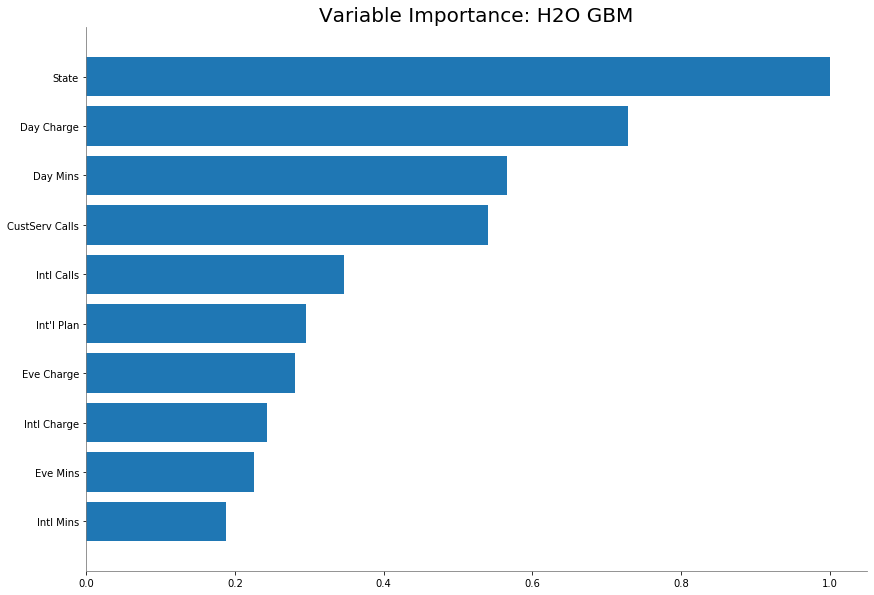

In [70]:
out.varimp_plot()